# **Text Classification using the Bag-of-Words approach**

In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import bs4 as bs
import urllib.request
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Some simple examples:

In [2]:
R1 = 'These socks looked good in the photo but they are pure trash.'
R2 = 'I have bought about 3 sets of these socks now; I love these socks!'

Using sklearn's count vectorizer, we obtain a numeric description of each text document. 

In [3]:
count_vect = CountVectorizer()
word_counts = count_vect.fit_transform([R1,R2])
count_vect.fit([R1,R2])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [4]:
count_vect = CountVectorizer()
count_vect.fit([R1,R2])
print('Vocabulary:\n',count_vect.vocabulary_)
print('Stop words:\n',count_vect.stop_words_)

Vocabulary:
 {'these': 16, 'socks': 14, 'looked': 7, 'good': 4, 'in': 6, 'the': 15, 'photo': 11, 'but': 3, 'they': 17, 'are': 1, 'pure': 12, 'trash': 18, 'have': 5, 'bought': 2, 'about': 0, 'sets': 13, 'of': 10, 'now': 9, 'love': 8}
Stop words:
 set()


Now the text data can be represented as a 2D array, as normally required by ML functions. 

In [5]:
#word_counts = count_vect.transform([R1,R2]).todense()
word_counts = count_vect.transform([R1,R2])
print(word_counts)
print(word_counts.todense())

  (0, 1)	1
  (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 7)	1
  (0, 11)	1
  (0, 12)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (1, 0)	1
  (1, 2)	1
  (1, 5)	1
  (1, 8)	1
  (1, 9)	1
  (1, 10)	1
  (1, 13)	1
  (1, 14)	2
  (1, 16)	2
[[0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1]
 [1 0 1 0 0 1 0 0 1 1 1 0 0 1 2 0 2 0 0]]


Where word_counts[i,j] represents the number of times that word j in the vocabulary appears in document i. 

The Books' data from gutemberg.org

In [6]:
def get_paragraph_list(url,skip):
    paragraphs = []
    data = urllib.request.urlopen(url).read()
    soup = bs.BeautifulSoup(data,'lxml')
    for paragraph in soup.find_all('p'):
        par  = paragraph.get_text()
        if par:
            if len(par)>=30:
              paragraphs.append(par)           
    return paragraphs[skip:]

url_list = ['http://www.gutenberg.org/files/215/215-h/215-h.htm', 'http://www.gutenberg.org/files/345/345-h/345-h.htm', 'http://www.gutenberg.org/files/1661/1661-h/1661-h.htm']

paragraphs = []
targets = []
first_par = []
skip = [1,4,0]
for u, url in enumerate(url_list):
    par = get_paragraph_list(url,skip[u])
    paragraphs = paragraphs + par
    targets = targets + [u for i in par]
    print('\nBook {} contains {} paragraphs'.format(u,len(par)))
    lengths = np.array([len(wl) for wl in par])
    print('Paragraph length stats:')
    print('min = {} max = {} mean = {:4f}'.format(np.min(lengths),np.max(lengths),np.mean(lengths)))
    print('First paragraph:')
    print(par[0])
    first_par.append(par[0])


Book 0 contains 328 paragraphs
Paragraph length stats:
min = 30 max = 1580 mean = 541.487805
First paragraph:

Buck did not read the newspapers, or he would have known that trouble was
brewing, not alone for himself, but for every tide-water dog, strong of muscle
and with warm, long hair, from Puget Sound to San Diego. Because men, groping
in the Arctic darkness, had found a yellow metal, and because steamship and
transportation companies were booming the find, thousands of men were rushing
into the Northland. These men wanted dogs, and the dogs they wanted were heavy
dogs, with strong muscles by which to toil, and furry coats to protect them
from the frost.


Book 1 contains 1748 paragraphs
Paragraph length stats:
min = 30 max = 4780 mean = 478.929062
First paragraph:
3 May. Bistritz.—Left Munich at 8:35 P. M., on 1st May, arriving at
Vienna early next morning; should have arrived at 6:46, but train was an
hour late. Buda-Pesth seems a wonderful place, from the glimpse which I
got of

Now let's split the data into training and test set and find the bag-of-words representation of the data.

Since we are not allowed to see the test data, the vectorizer must be fitted to the training data only.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(paragraphs, targets, test_size=0.2, random_state=4361)

A randomly-chosen training example and its class:

In [8]:
i = np.random.randint(len(x_train))
print(x_train[i])
#print(y_train[i])


“‘Then, good-night.’ I kissed her and went up to my
bedroom again, where I was soon asleep.



In [9]:
count_vect = CountVectorizer()
count_vect.fit(x_train)
x_train_counts = count_vect.transform(x_train)
x_test_counts = count_vect.transform(x_test)
print('Training set has {} examples, {} features'.format(x_train_counts.shape[0], x_train_counts.shape[1]))
print('Test set has {} examples, {} features'.format(x_test_counts.shape[0], x_test_counts.shape[1]))

Training set has 3406 examples, 12819 features
Test set has 852 examples, 12819 features


In [10]:
print('Vocabulary:', count_vect.vocabulary_.keys())
print('Sorted words in vocabulary:', sorted(list(count_vect.vocabulary_.keys())))
print('Stop words:', count_vect.stop_words_)

Vocabulary: dict_keys(['am', 'naturally', 'observant', 'as', 'you', 'may', 'have', 'remarked', 'mr', 'holmes', 'and', 'soon', 'had', 'pretty', 'good', 'plan', 'of', 'the', 'whole', 'house', 'in', 'my', 'head', 'there', 'was', 'one', 'wing', 'however', 'which', 'appeared', 'not', 'to', 'be', 'inhabited', 'at', 'all', 'door', 'faced', 'that', 'led', 'into', 'quarters', 'tollers', 'opened', 'this', 'suite', 'but', 'it', 'invariably', 'locked', 'day', 'ascended', 'stair', 'met', 'rucastle', 'coming', 'out', 'through', 'his', 'keys', 'hand', 'look', 'on', 'face', 'made', 'him', 'very', 'different', 'person', 'round', 'jovial', 'man', 'whom', 'accustomed', 'cheeks', 'were', 'red', 'brow', 'crinkled', 'with', 'anger', 'veins', 'stood', 'temples', 'passion', 'he', 'hurried', 'past', 'me', 'without', 'word', 'or', 'slept', 'baker', 'street', 'night', 'we', 'engaged', 'upon', 'our', 'toast', 'coffee', 'morning', 'when', 'king', 'bohemia', 'rushed', 'room', 'jabez', 'wilson', 'started', 'up', 'ch

Now let's classify the data

In [11]:
clf = MultinomialNB()
clf.fit(x_train_counts, y_train)
pred = clf.predict(x_test_counts)
print('Model accuracy: {:.4f}'.format(accuracy_score(y_test,pred)))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))


Model accuracy: 0.9061
Confusion matrix:
 [[ 54  10   2]
 [  0 335  19]
 [  1  48 383]]


In [12]:
knn = KNeighborsClassifier()
knn.fit(x_train_counts, y_train)
pred = knn.predict(x_test_counts)
print('Model accuracy: {:.4f}'.format(accuracy_score(y_test,pred)))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

Model accuracy: 0.6984
Confusion matrix:
 [[ 30  11  25]
 [  3 183 168]
 [  2  48 382]]


In [13]:
svc = SVC()
svc.fit(x_train_counts, y_train)
pred = svc.predict(x_test_counts)
print('Model accuracy: {:.4f}'.format(accuracy_score(y_test,pred)))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

Model accuracy: 0.8169
Confusion matrix:
 [[ 45   4  17]
 [  0 239 115]
 [  0  20 412]]


In [14]:
model = RandomForestClassifier()
model.fit(x_train_counts, y_train)
pred = model.predict(x_test_counts)
print('Model accuracy: {:.4f}'.format(accuracy_score(y_test,pred)))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

Model accuracy: 0.8192
Confusion matrix:
 [[ 37  16  13]
 [  0 258  96]
 [  0  29 403]]


One problem with this approach is that words that appear too rarely or too often are normally not very informative.

We can see how to ignore them in the CountVectorizer() documentation.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [15]:
count_vect = CountVectorizer(min_df=2, max_df = 0.3)
count_vect.fit(x_train)
x_train_counts = count_vect.transform(x_train)
x_test_counts = count_vect.transform(x_test)
print('Training set has {} examples, {} features'.format(x_train_counts.shape[0], x_train_counts.shape[1]))
print('Test set has {} examples, {} features'.format(x_test_counts.shape[0], x_test_counts.shape[1]))

Training set has 3406 examples, 7170 features
Test set has 852 examples, 7170 features


In [16]:
print('Vocabulary:', count_vect.vocabulary_.keys())
print('Sorted words in vocabulary:', sorted(list(count_vect.vocabulary_.keys())))
print('Stop words:', count_vect.stop_words_)

Vocabulary: dict_keys(['am', 'naturally', 'observant', 'may', 'have', 'remarked', 'mr', 'holmes', 'soon', 'had', 'pretty', 'good', 'plan', 'whole', 'house', 'my', 'head', 'there', 'one', 'wing', 'however', 'which', 'appeared', 'be', 'inhabited', 'all', 'door', 'faced', 'led', 'into', 'quarters', 'opened', 'this', 'suite', 'invariably', 'locked', 'day', 'ascended', 'stair', 'met', 'rucastle', 'coming', 'out', 'through', 'keys', 'hand', 'look', 'on', 'face', 'made', 'him', 'very', 'different', 'person', 'round', 'jovial', 'man', 'whom', 'accustomed', 'cheeks', 'were', 'red', 'brow', 'anger', 'veins', 'stood', 'temples', 'passion', 'hurried', 'past', 'me', 'without', 'word', 'or', 'slept', 'baker', 'street', 'night', 'we', 'engaged', 'upon', 'our', 'coffee', 'morning', 'when', 'king', 'bohemia', 'rushed', 'room', 'jabez', 'wilson', 'started', 'up', 'chair', 'forefinger', 'paper', 'eyes', 'companion', 'some', 'business', 'do', 'will', 'take', 'hours', 'coburg', 'square', 'serious', 'strong

In [17]:
clf = MultinomialNB()
clf.fit(x_train_counts, y_train)
pred = clf.predict(x_test_counts)
print('NB accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

knn = KNeighborsClassifier()
knn.fit(x_train_counts, y_train)
pred = knn.predict(x_test_counts)
print('K-nn accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

svc = SVC()
svc.fit(x_train_counts, y_train)
pred = svc.predict(x_test_counts)
print('SVC accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

model = RandomForestClassifier()
model.fit(x_train_counts, y_train)
pred = model.predict(x_test_counts)
print('RF accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

NB accuracy: 0.9049
Confusion matrix:
 [[ 57   7   2]
 [  2 329  23]
 [  2  45 385]]
K-nn accuracy: 0.6796
Confusion matrix:
 [[  8  11  47]
 [  1 164 189]
 [  0  25 407]]
SVC accuracy: 0.8275
Confusion matrix:
 [[ 39  14  13]
 [  0 256  98]
 [  0  22 410]]
RF accuracy: 0.8322
Confusion matrix:
 [[ 42  15   9]
 [  0 275  79]
 [  0  40 392]]


We can binarize features. 

In [18]:
count_vect = CountVectorizer(min_df=2, max_df = 0.3,binary=True)
count_vect.fit(x_train)
x_train_counts = count_vect.transform(x_train)
x_test_counts = count_vect.transform(x_test)
print('Training set has {} examples, {} features'.format(x_train_counts.shape[0], x_train_counts.shape[1]))
print('Test set has {} examples, {} features'.format(x_test_counts.shape[0], x_test_counts.shape[1]))

Training set has 3406 examples, 7170 features
Test set has 852 examples, 7170 features


In [19]:
clf = MultinomialNB()
clf.fit(x_train_counts, y_train)
pred = clf.predict(x_test_counts)
print('NB accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

knn = KNeighborsClassifier()
knn.fit(x_train_counts, y_train)
pred = knn.predict(x_test_counts)
print('K-nn accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

svc = SVC()
svc.fit(x_train_counts, y_train)
pred = svc.predict(x_test_counts)
print('SVC accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

model = RandomForestClassifier()
model.fit(x_train_counts, y_train)
pred = model.predict(x_test_counts)
print('RF accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

NB accuracy: 0.9131
Confusion matrix:
 [[ 57   7   2]
 [  1 331  22]
 [  1  41 390]]
K-nn accuracy: 0.6279
Confusion matrix:
 [[  1   6  59]
 [  0 120 234]
 [  0  18 414]]
SVC accuracy: 0.8275
Confusion matrix:
 [[ 37  19  10]
 [  0 261  93]
 [  0  25 407]]
RF accuracy: 0.8392
Confusion matrix:
 [[ 46  13   7]
 [  0 265  89]
 [  0  28 404]]


We can add 2-word sequences to the vocabulary. 

In [23]:
count_vect = CountVectorizer(min_df=2, max_df = 0.3, ngram_range=(1,3))
count_vect.fit(x_train)
x_train_counts = count_vect.transform(x_train)
x_test_counts = count_vect.transform(x_test)
print('Training set has {} examples, {} features'.format(x_train_counts.shape[0], x_train_counts.shape[1]))
print('Test set has {} examples, {} features'.format(x_test_counts.shape[0], x_test_counts.shape[1]))

Training set has 3406 examples, 46859 features
Test set has 852 examples, 46859 features


In [24]:
clf = MultinomialNB()
clf.fit(x_train_counts, y_train)
pred = clf.predict(x_test_counts)
print('NB accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(pred,y_test))

knn = KNeighborsClassifier()
knn.fit(x_train_counts, y_train)
pred = knn.predict(x_test_counts)
print('K-nn accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(pred,y_test))

svc = SVC()
svc.fit(x_train_counts, y_train)
pred = svc.predict(x_test_counts)
print('SVC accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(pred,y_test))

model = RandomForestClassifier()
model.fit(x_train_counts, y_train)
pred = model.predict(x_test_counts)
print('RF accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(pred,y_test))

NB accuracy: 0.9131
Confusion matrix:
 [[ 54   0   1]
 [  9 336  43]
 [  3  18 388]]
K-nn accuracy: 0.6021
Confusion matrix:
 [[  6   1   1]
 [ 11 129  53]
 [ 49 224 378]]
SVC accuracy: 0.8181
Confusion matrix:
 [[ 37   0   0]
 [ 13 249  21]
 [ 16 105 411]]
RF accuracy: 0.8345
Confusion matrix:
 [[ 40   0   0]
 [ 14 264  25]
 [ 12  90 407]]


And add binarization

In [31]:
count_vect = CountVectorizer(min_df=3, max_df = 0.15, ngram_range=(1,3),binary=True)
count_vect.fit(x_train)
x_train_counts = count_vect.transform(x_train)
x_test_counts = count_vect.transform(x_test)
print('Training set has {} examples, {} features'.format(x_train_counts.shape[0], x_train_counts.shape[1]))
print('Test set has {} examples, {} features'.format(x_test_counts.shape[0], x_test_counts.shape[1]))

clf = MultinomialNB()
clf.fit(x_train_counts, y_train)
pred = clf.predict(x_test_counts)
print('NB accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(pred,y_test))

knn = KNeighborsClassifier()
knn.fit(x_train_counts, y_train)
pred = knn.predict(x_test_counts)
print('K-nn accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(pred,y_test))

svc = SVC()
svc.fit(x_train_counts, y_train)
pred = svc.predict(x_test_counts)
print('SVC accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(pred,y_test))

model = RandomForestClassifier()
model.fit(x_train_counts, y_train)
pred = model.predict(x_test_counts)
print('RF accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(pred,y_test))

Training set has 3406 examples, 23611 features
Test set has 852 examples, 23611 features
NB accuracy: 0.9143
Confusion matrix:
 [[ 55   0   1]
 [  7 325  32]
 [  4  29 399]]
K-nn accuracy: 0.5904
Confusion matrix:
 [[  5   2   7]
 [  3  88  15]
 [ 58 264 410]]
SVC accuracy: 0.8028
Confusion matrix:
 [[ 33   0   0]
 [ 18 247  28]
 [ 15 107 404]]
RF accuracy: 0.8486
Confusion matrix:
 [[ 44   0   0]
 [ 11 278  31]
 [ 11  76 401]]


In addition to using a bag-of-words representation, we can use **TFIDF**, the **term frequency–inverse document frequency**, a numerical statistic that is intended to reflect how important a word is to a document in a collection.

See https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

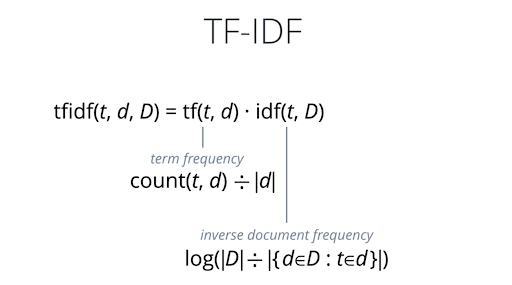

In [ ]:
count_vect = CountVectorizer(min_df=2, max_df = 0.3, ngram_range=(1,2))
count_vect.fit(x_train)
x_train_counts = count_vect.transform(x_train)
x_test_counts = count_vect.transform(x_test)
print('Training set has {} examples, {} features'.format(x_train_counts.shape[0], x_train_counts.shape[1]))
print('Test set has {} examples, {} features'.format(x_test_counts.shape[0], x_test_counts.shape[1]))

tfidf_transformer = TfidfTransformer()
x_train_counts = tfidf_transformer.fit_transform(x_train_counts)
x_test_counts = tfidf_transformer.transform(x_test_counts)

clf = MultinomialNB()
clf.fit(x_train_counts, y_train)
pred = clf.predict(x_test_counts)
print('NB accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(pred,y_test))

knn = KNeighborsClassifier()
knn.fit(x_train_counts, y_train)
pred = knn.predict(x_test_counts)
print('K-nn accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(pred,y_test))

svc = SVC()
svc.fit(x_train_counts, y_train)
pred = svc.predict(x_test_counts)
print('SVC accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(pred,y_test))

model = RandomForestClassifier()
model.fit(x_train_counts, y_train)
pred = model.predict(x_test_counts)
print('RF accuracy: {:.4f}'.format(accuracy_score(pred,y_test)))
print('Confusion matrix:\n',confusion_matrix(pred,y_test))

**Exercise:** Try to obtain the best possible performance by selecting a classifier and testing various parameter choices for the classifier and the vectorizer. 